# Text Mining Project
Alberico Arcangelo - mat. 0000949525

# Import libraries and load the dataset

In [ ]:
install.packages("lsa")
install.packages("tm")
install.packages("dplyr")
install.packages("plot3D")
library(tm)
library(lsa)
library(dplyr)
library(plot3D)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘SnowballC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘misc3d’


Loading required package: NLP

Loading required package: SnowballC


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“no DISPLAY variable so Tk is not available”


In [ ]:
my_data <- read.csv("data.csv", sep = "\t", quote = "")
head(my_data)

,text,clickbait
,<chr>,<int>
1,Should I Get Bings,1
2,Which TV Female Friend Group Do You Belong In,1
3,"The New ""Star Wars: The Force Awakens"" Trailer Is Here To Give You Chills",1
4,"This Vine Of New York On ""Celebrity Big Brother"" Is Fucking Perfect",1
5,A Couple Did A Stunning Photo Shoot With Their Baby After Learning She Had An Inoperable Brain Tumor,1
6,How To Flirt With Queer Girls Without Making A Total Fool Of Yourself,1


In [ ]:
clickbait = my_data$clickbait
text_title = my_data$text

# Preprocess the data

Firstly, the text is preprocessed by transforming into lowercase, removing the punctuation and the stopwords

In [ ]:
corpus <- Corpus(VectorSource(my_data$text))
corpus <- tm_map(corpus, tolower)
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, function(x) removeWords(x, stopwords("english")))
corpus

Warning message in tm_map.SimpleCorpus(corpus, tolower):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) removeWords(x, stopwords("english"))):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 32001

Construct the term document matrix

In [ ]:
tdmc <- TermDocumentMatrix(corpus)
tdmc

<<TermDocumentMatrix (terms: 24373, documents: 32001)>>
Non-/sparse entries: 191935/779768438
Sparsity           : 100%
Maximal term length: 58
Weighting          : term frequency (tf)

Remove terms which appear in less than the 0.2% of the documents

In [ ]:
tdms <- removeSparseTerms(tdmc, 0.998)
tdms

<<TermDocumentMatrix (terms: 508, documents: 32001)>>
Non-/sparse entries: 74743/16181765
Sparsity           : 100%
Maximal term length: 13
Weighting          : term frequency (tf)

In [ ]:
colnames(tdms) <- 1:32001
words <- rownames(tdms)

Build the term-document matrix

In [ ]:
tdm <- as.matrix(tdms)
head(tdm)

,1,2,3,4,5,6,7,8,9,10,⋯,31992,31993,31994,31995,31996,31997,31998,31999,32000,32001
get,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
friend,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
group,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
force,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
give,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
new,0,0,1,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


To improve the informative content of the matrix, **term weighting** techniques are applied. In particular, for this case, we use:


*   **Logarithm of the term frequency** which is a local factor based only on temrs in the same document;
*   **Inverse entropy** which is a global factor based also on the other documents.



In [ ]:
tdmle <- lw_logtf(tdm) * (1-entropy(tdm))
head(tdmle)

,1,2,3,4,5,6,7,8,9,10,⋯,31992,31993,31994,31995,31996,31997,31998,31999,32000,32001
get,0.2998443,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
friend,0.0000000,0.3940269,0.0000000,0.0000000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
group,0.0000000,0.3653822,0.0000000,0.0000000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
force,0.0000000,0.0000000,0.3902839,0.0000000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
give,0.0000000,0.0000000,0.3574571,0.0000000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
new,0.0000000,0.0000000,0.2177547,0.2177547,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


# Latent Semantic Analysis

Calculates the latent semantic space from the given term-document matrix.

In [ ]:
lsar <- lsa(tdmle)
lsad <- length(lsar$sk)
lsad

[1] 209

Plot of the singular values

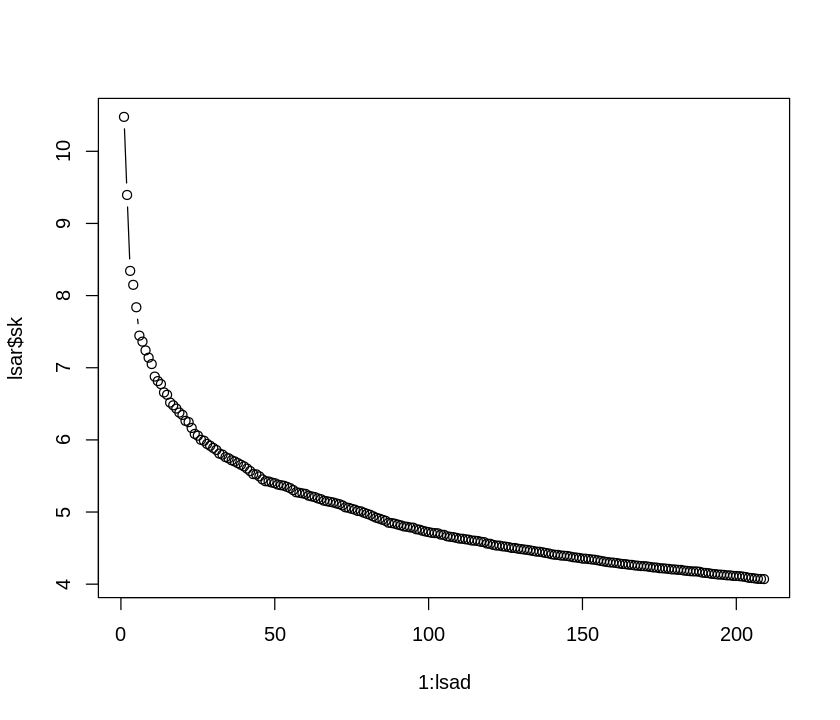

In [ ]:
options(repr.plot.width=7, repr.plot.height=6)
plot(1:lsad, lsar$sk, type="b")

Projets terms and documents in the latent space

In [ ]:
tls <- lsar$tk %*% diag(lsar$sk)
dls <- lsar$dk %*% diag(lsar$sk)

# Normalized terms and documents projection
normrows <- function(x) x / apply(x, 1, norm, "2")
tlsn <- normrows(tls)
dlsn <- normrows(dls)

# Matrix used in the analysis to calculate similarity between query and terms
tksrs <- lsar$tk %*% diag(sqrt(lsar$sk))

Plot of the terms in the latent dimensions 1 and 2

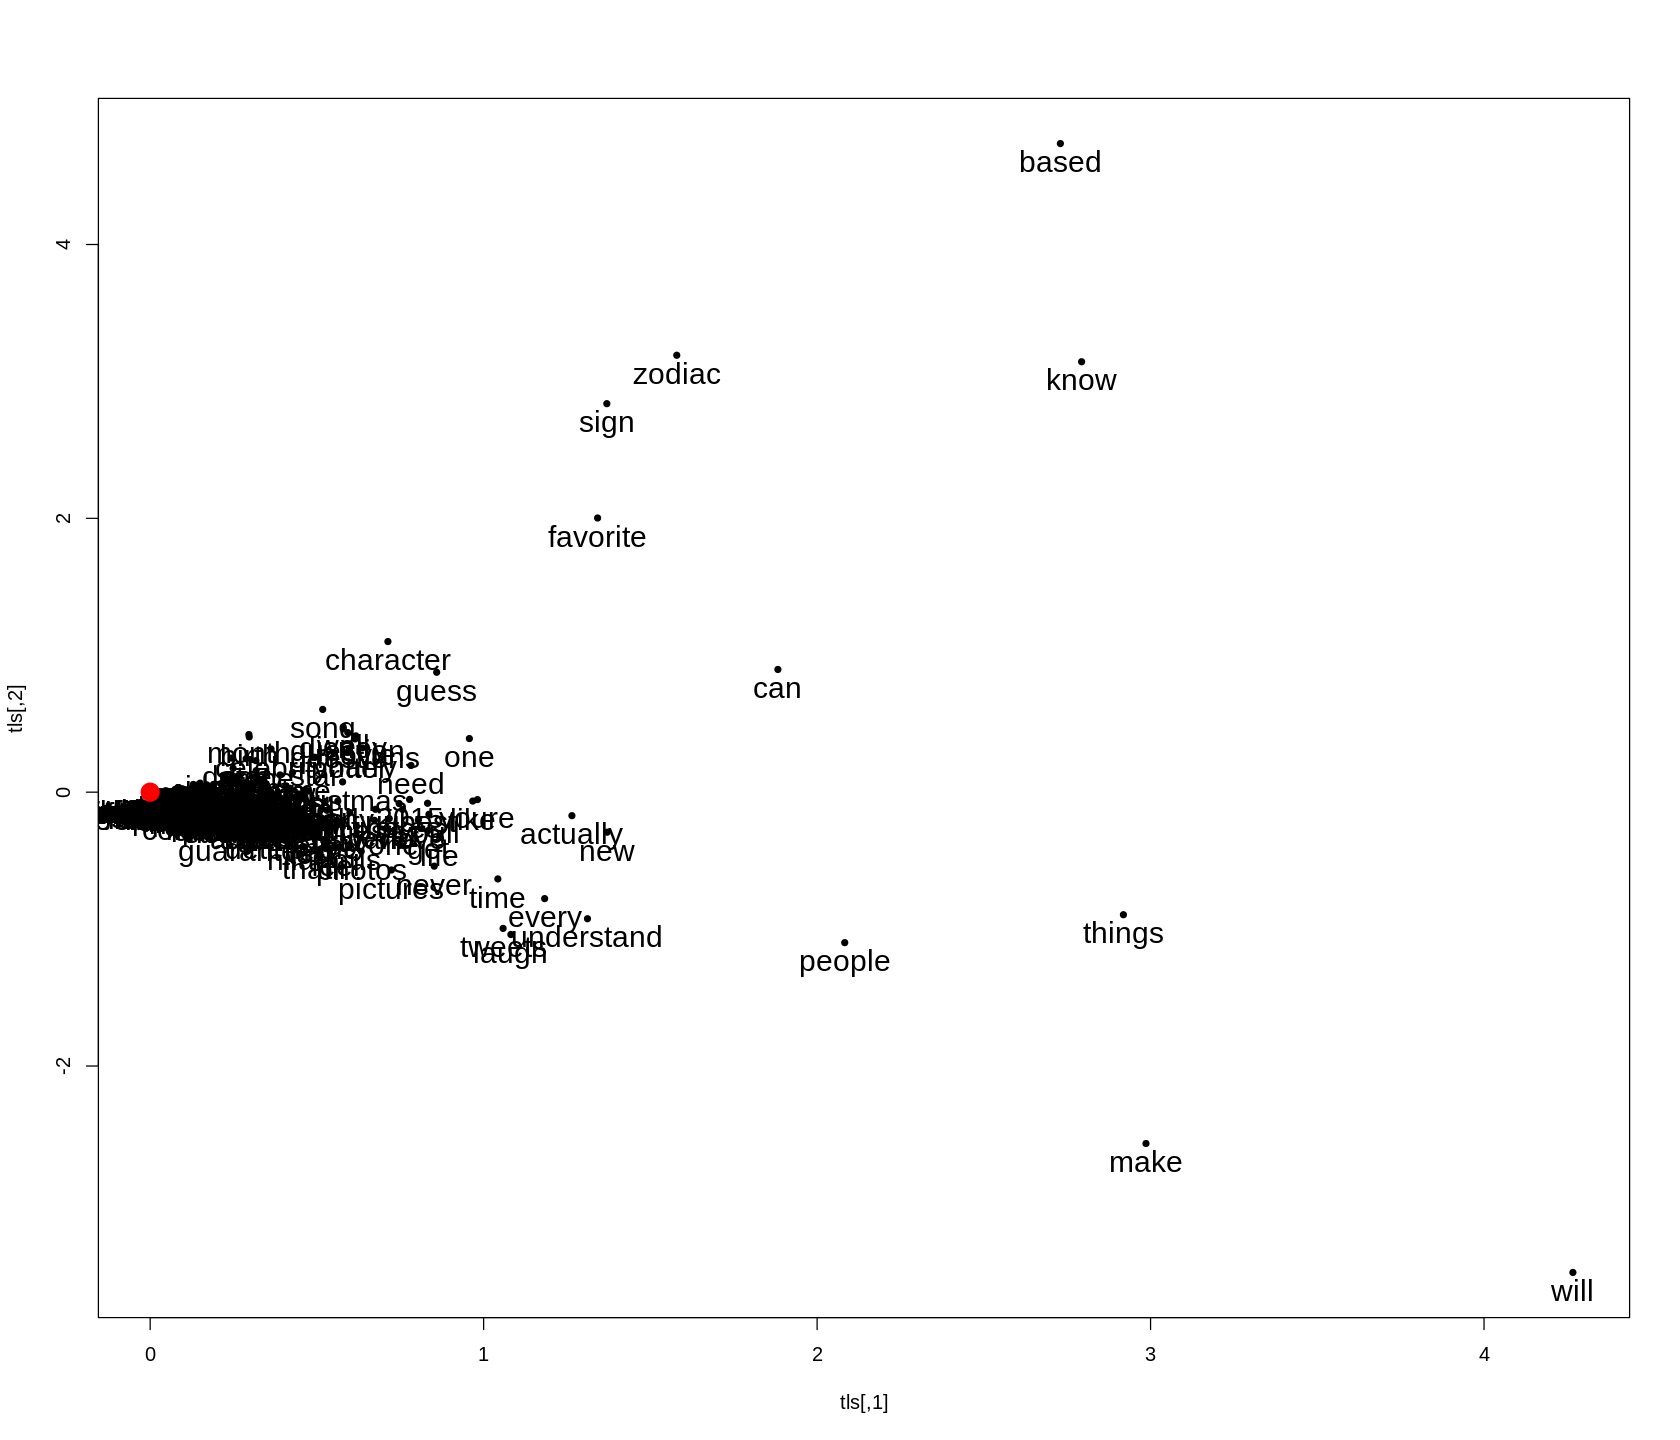

In [ ]:
options(repr.plot.width=14, repr.plot.height=12)
plot(tls, pch=20)
text(tls, labels=words, cex=1.5, pos=1)
points(0, 0, pch=20, cex=3, col="red")

# Analysis

## Term choice

Firstly we convert class names in colors to distinguish the clickbait titles from the non-clickbait titles in the graph

In [ ]:
clickcols = as.vector(recode(clickbait, "1"="red", "0"="green"))

The first dimension of the latent space is predominant with respect to the other dimensions. So, we can see if, by discarding it, we can discover some useful information about the terms and titles distribution.

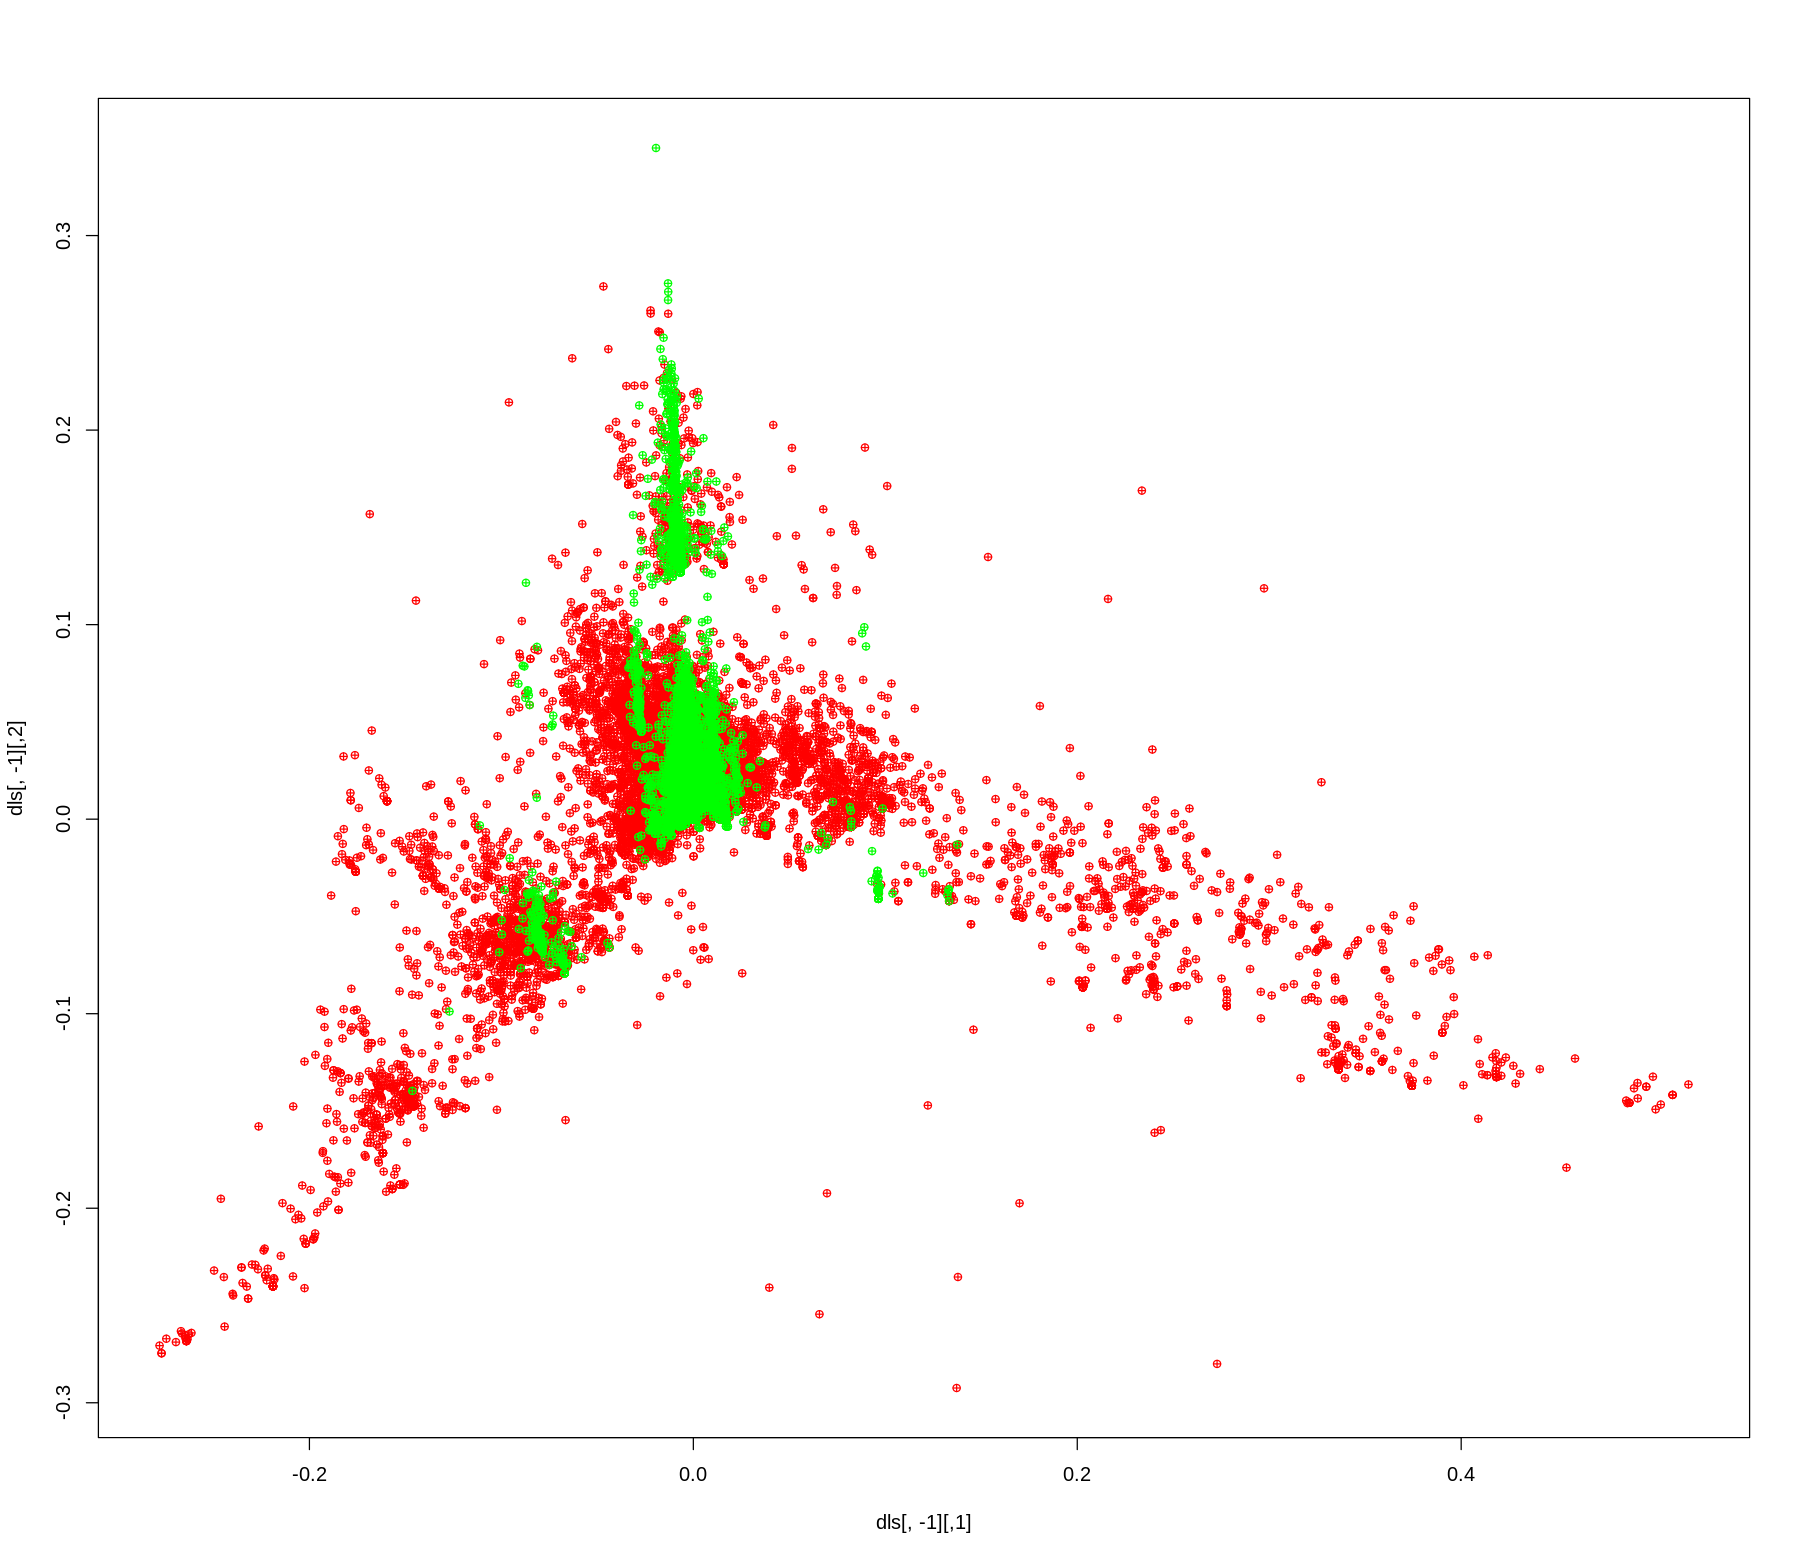

In [ ]:
options(repr.plot.width=15, repr.plot.height=13)
plot(dls[,-1], pch=10, cex=0.8, col=clickcols)

The second and third dimension manage to caputure better the distinction between clickbait and non clickbait titles. Let's plot both the normalized titles and terms on the same graph.

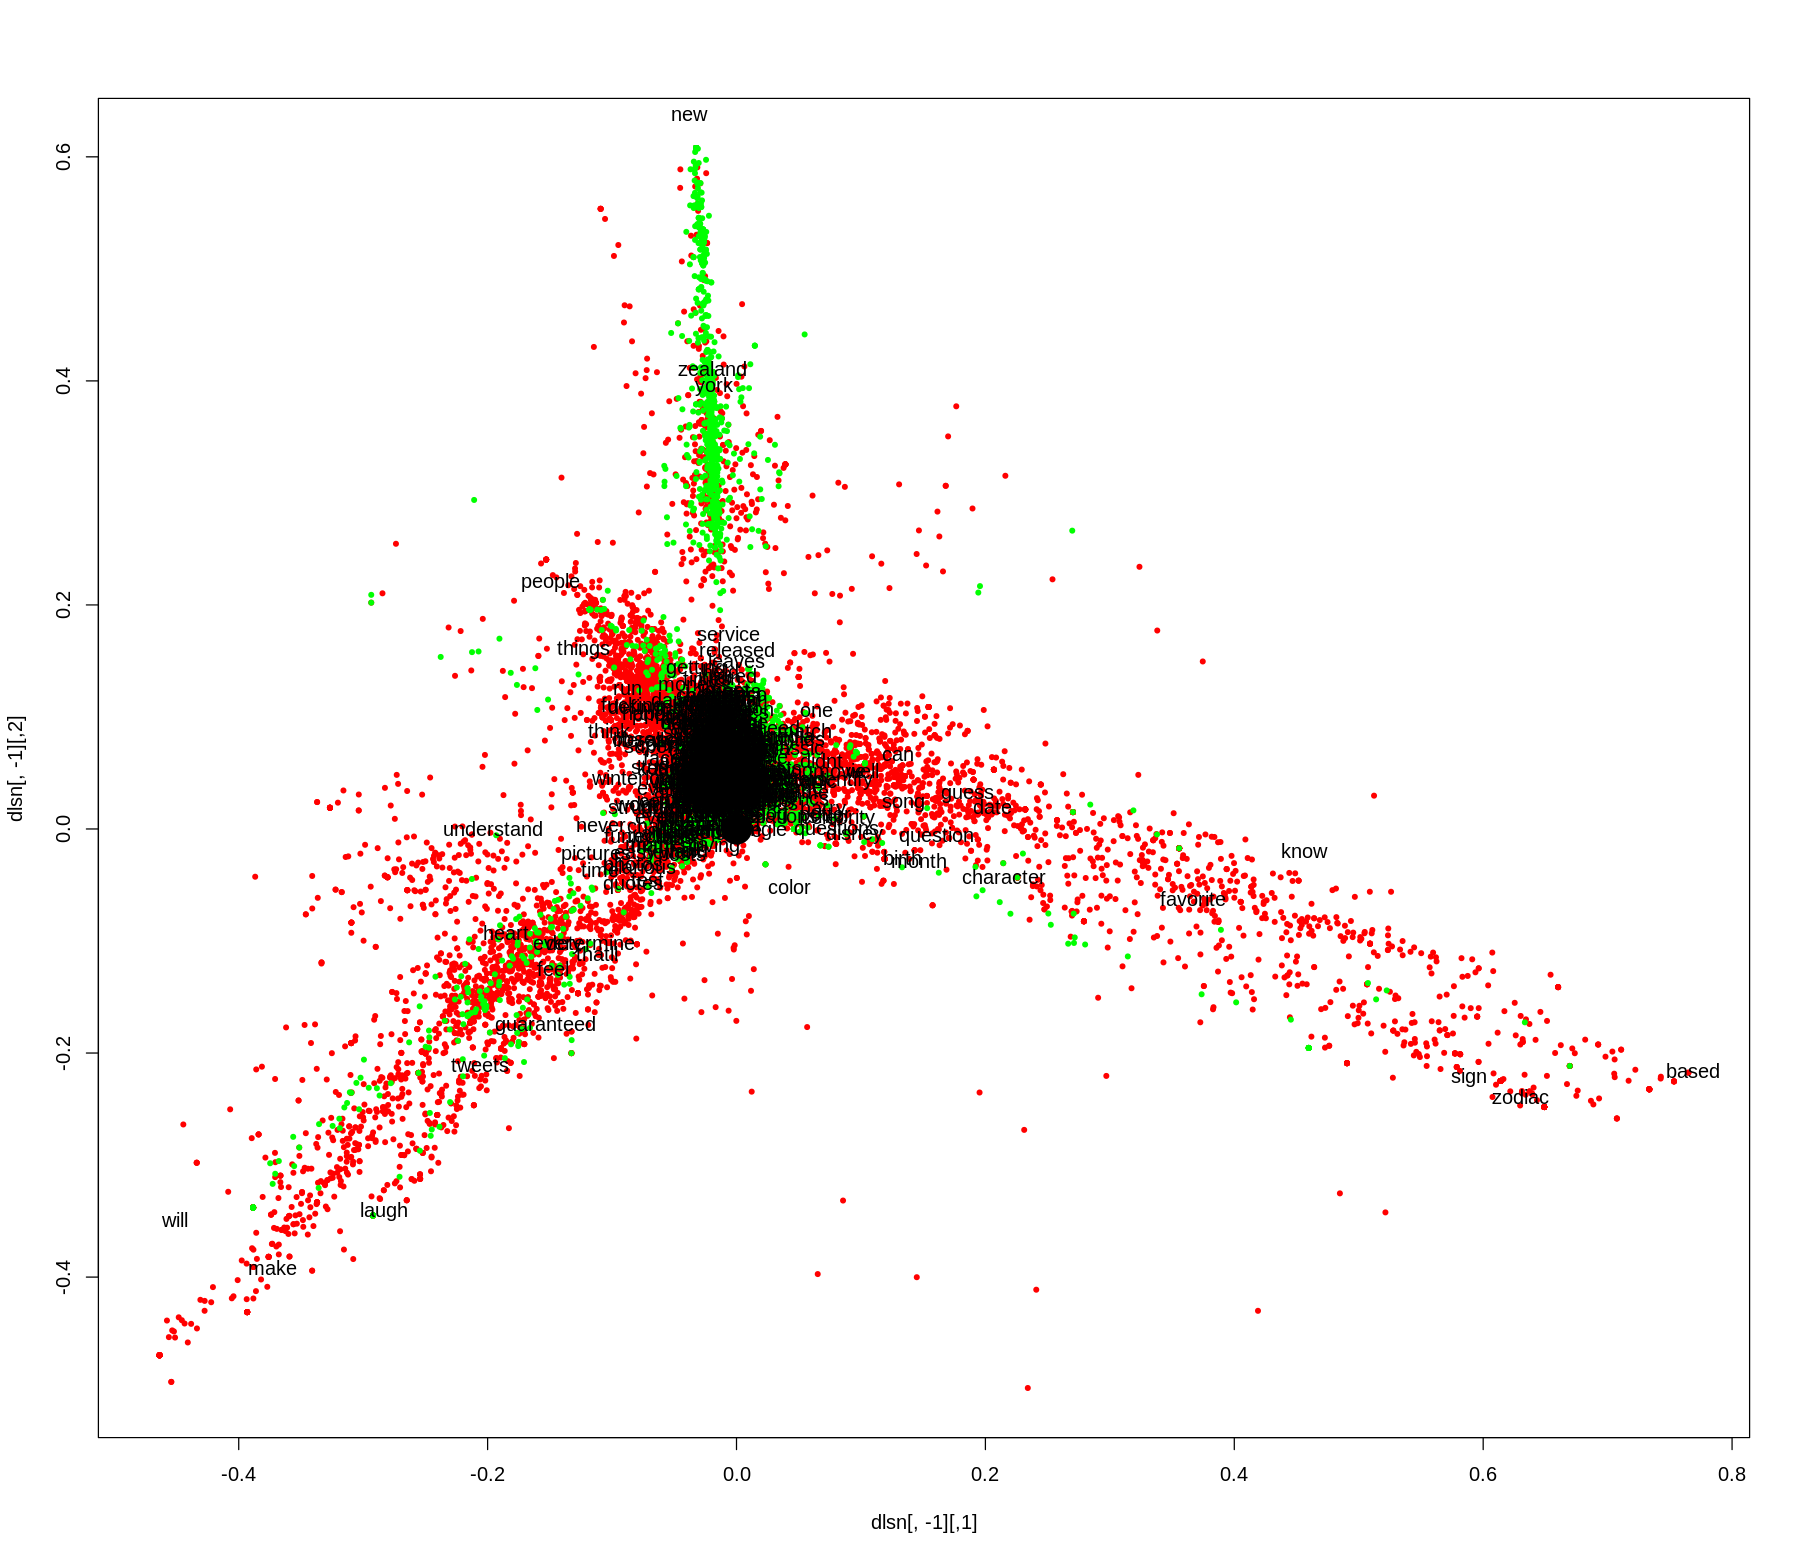

In [ ]:
options(repr.plot.width=15, repr.plot.height=13)
plot(dlsn[,-1], pch=20, cex=0.8, col=clickcols)
text(tlsn[,-1], labels=words, cex=1)
points(0, 0, pch=20, cex=5)

From the graph we can see that there are some interesting terms to make some analysis on because they are located in areas with an unusual concentration of clickbait tiltes. Among these terms we have `favorite` and `laugh`.

First of all let's choose a good number of dimension for the analysis, not too high to include too many details and not too low to have a loss of information. For this purpose we take the highest singular values up to a knee point which is a local minimum of the curvation radius of the decreasing singular value sequence.

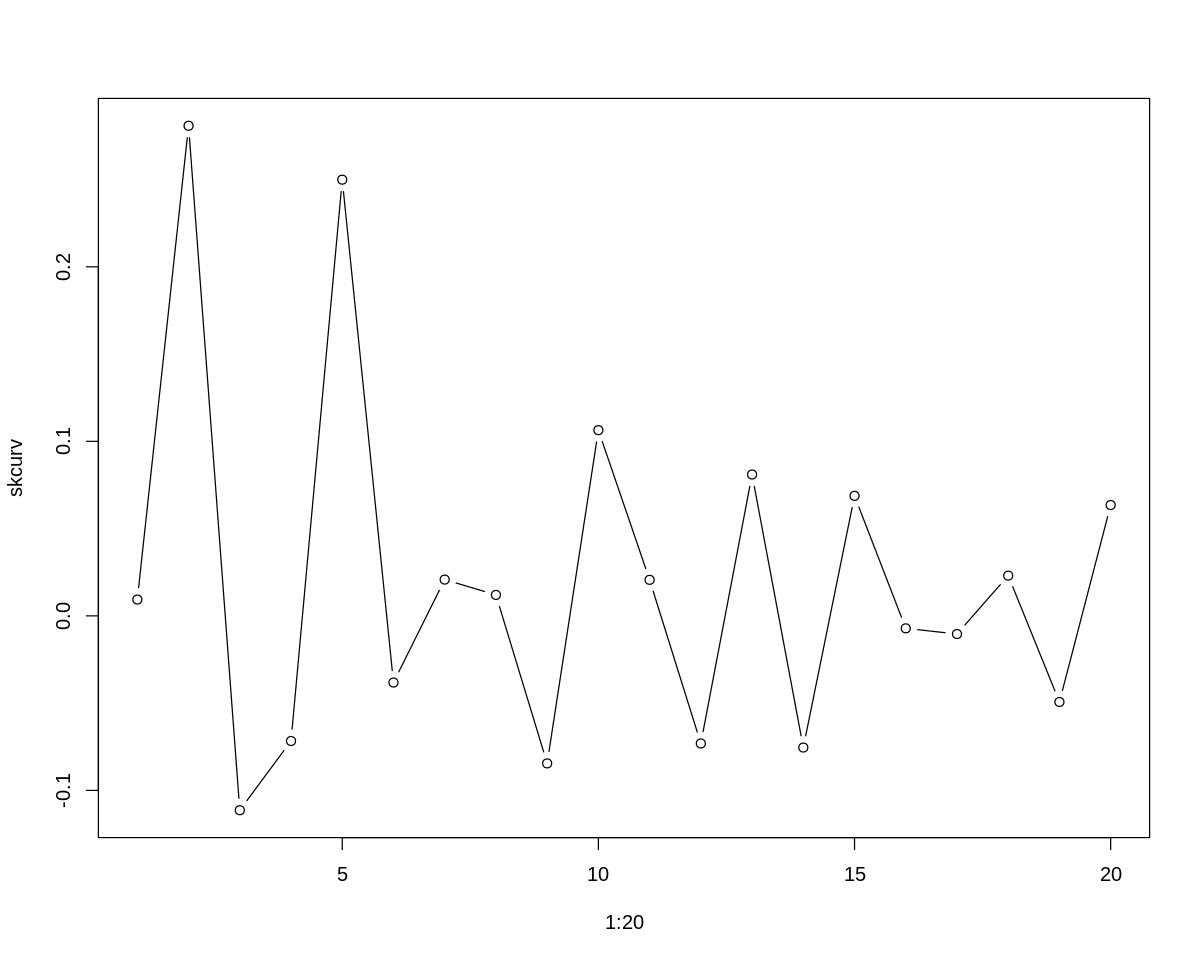

In [ ]:
fordiff <- function(x) x[2:length(x)] - x[1:(length(x)-1)]
skd <- fordiff(lsar$sk)
skdd <- fordiff(skd)
skcurv <- skdd[1:20] / (1+(skd[1:20])^2)^1.5
options(repr.plot.width=10, repr.plot.height=8)
plot(1:20, skcurv, type="b")

The first local minimum is `3` and we can do the analysis with the highest three dimensions.

In [ ]:
analysis_dim = 1:3

Being only 3 dimensions we can plot them in a 3D graph for visualization purpose.

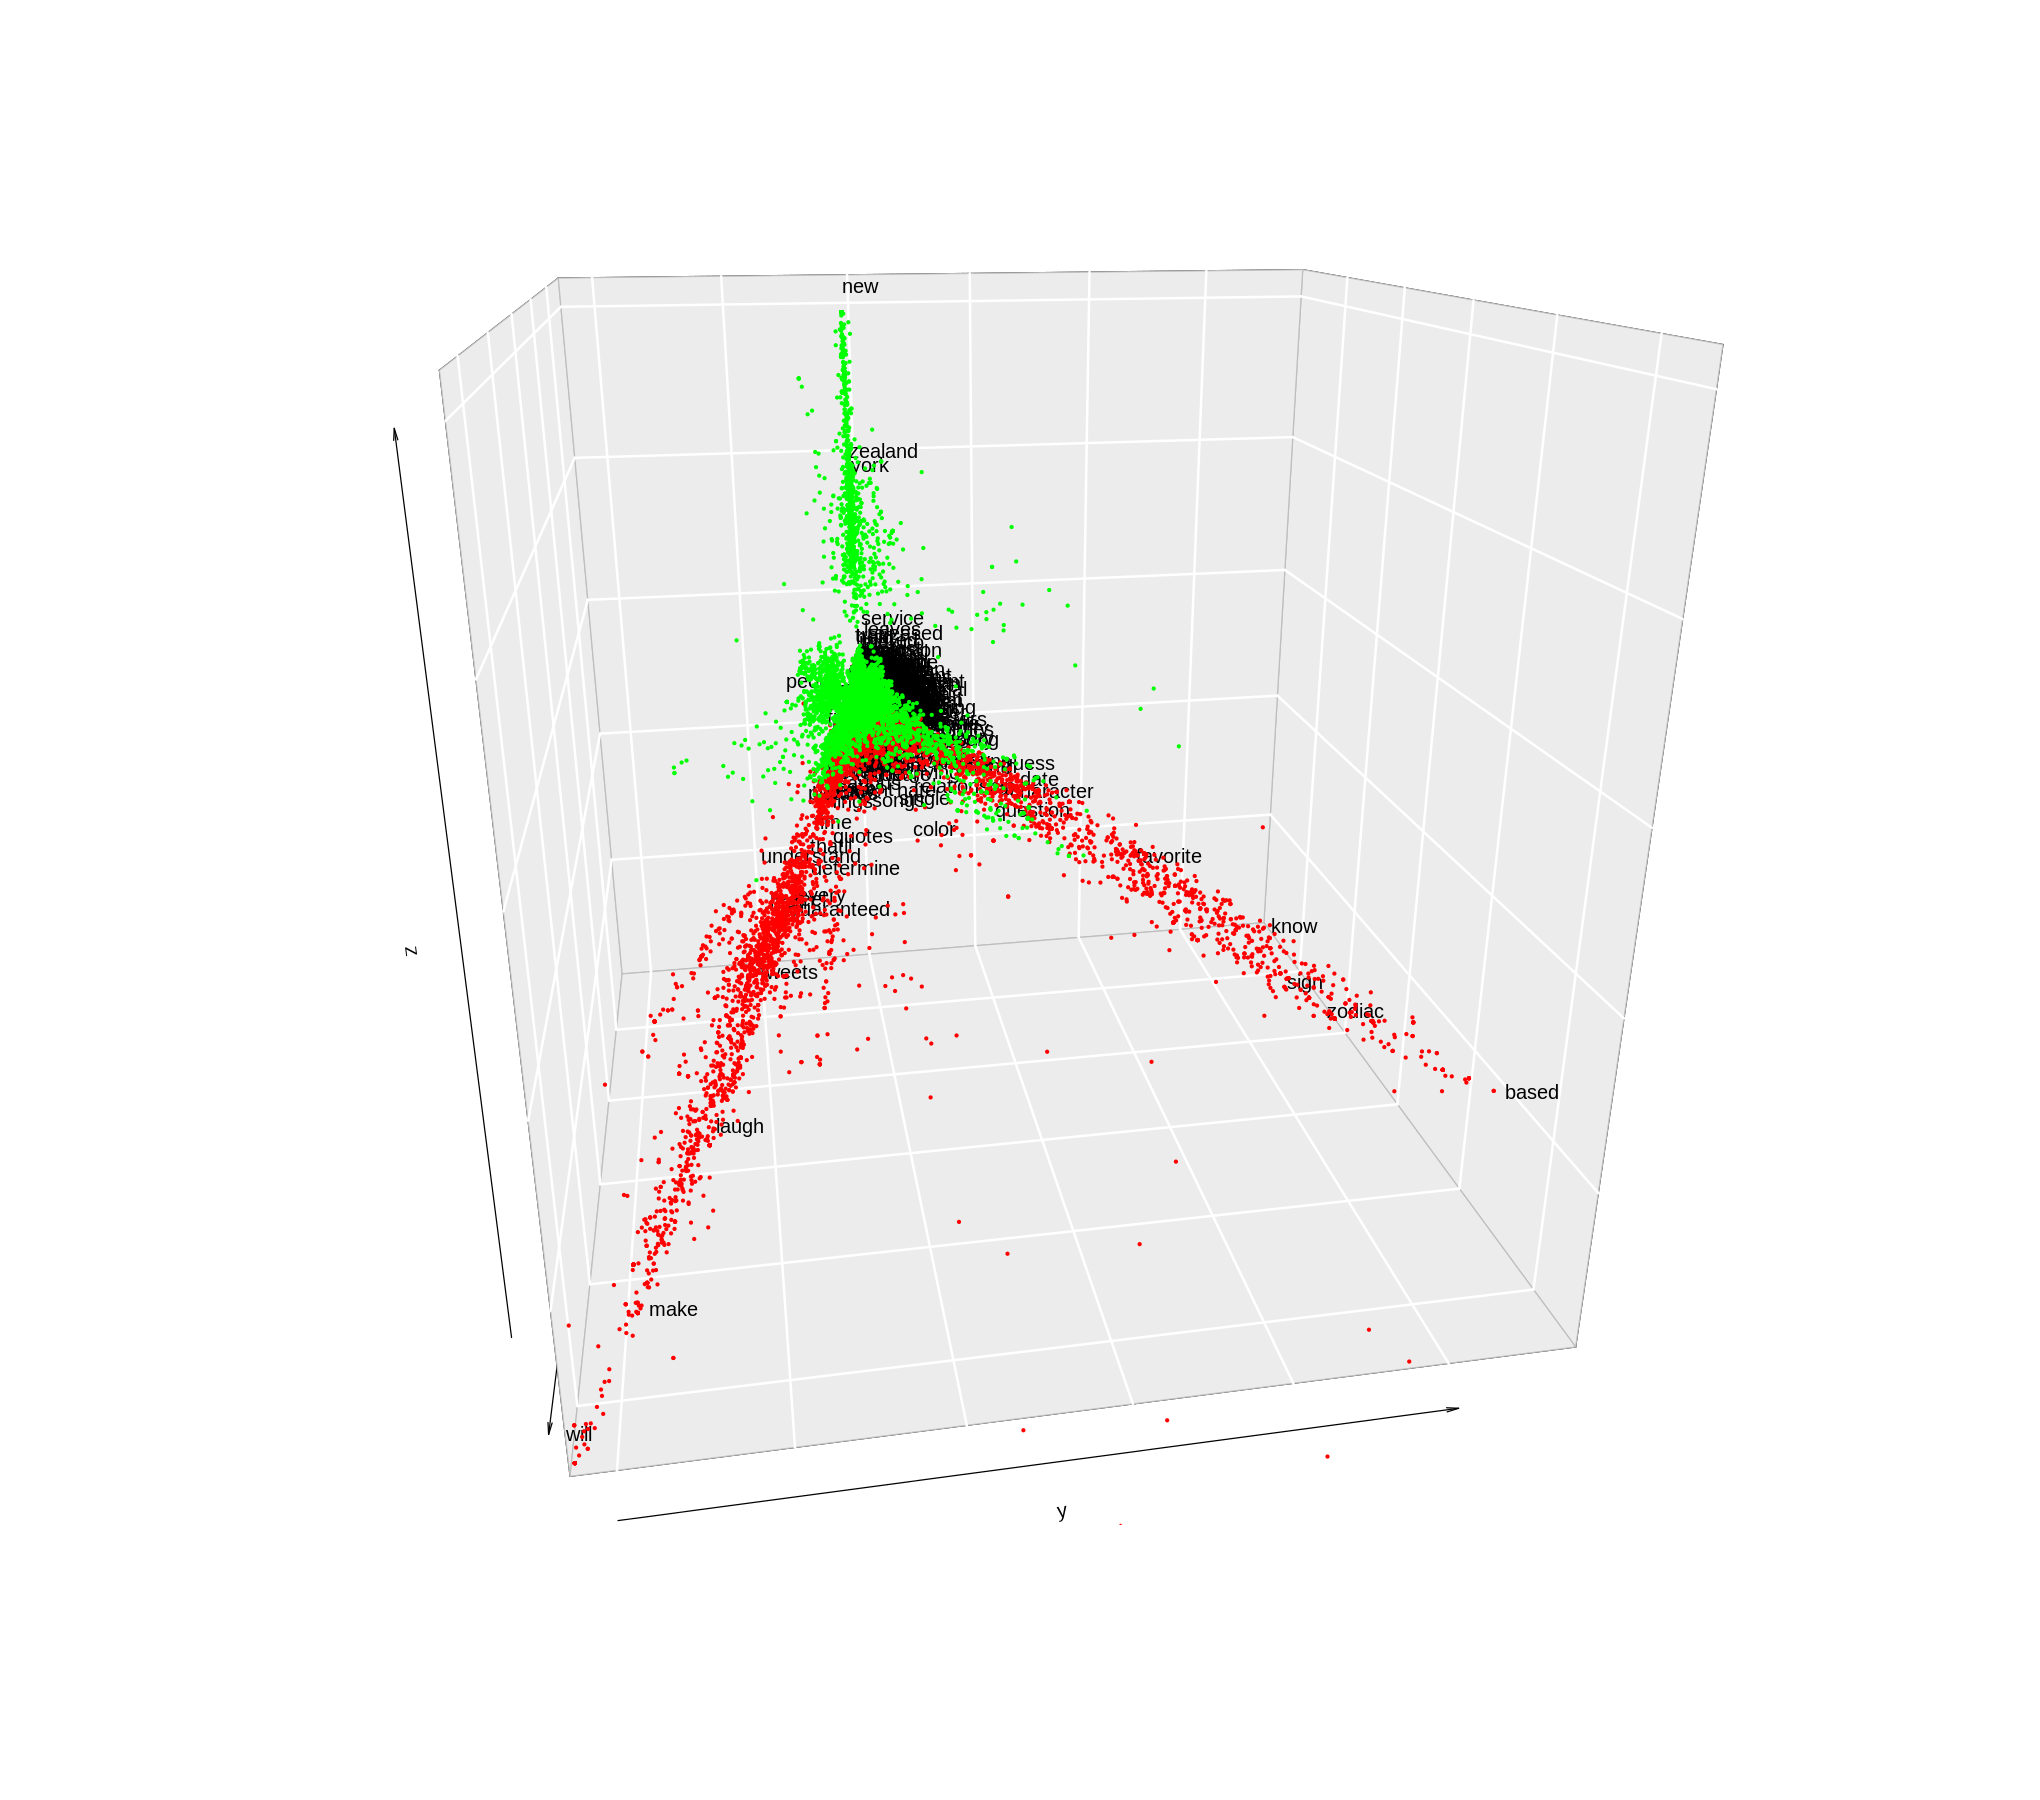

In [ ]:
options(repr.plot.width=17, repr.plot.height=15)
text3D(tlsn[,1], tlsn[,2], tlsn[,3], labels=words, cex=1, phi=20, theta=80, bty="g")
scatter3D(dlsn[,1], dlsn[,2], dlsn[,3], pch=20, cex=0.5, col=clickcols, colkey=FALSE, add=T)

## Utility functions
Frequently used functions in the analysis

In [ ]:
# Function to calculate cosine similarity between vector Q and the rows of the matrix X
cosines <- function(X, Q) apply( X, 1, cosine, as.vector(Q) )

# Function to retreive the indexes of the highest N values in X
top <- function(X, N) order( X, decreasing=TRUE )[1:N]

# Vector containing the norm of all the terms
tnorms <- apply(tls[, analysis_dim], 1, norm, "2")

# Function which create a query and project it into the LSA space
# Q: query, TDM: term-document matrix, LSA: latent semantic space
makequery <- function(Q, TDM, LSA) {
    V <- query(Q, rownames(TDM))                              # One-hot encoding of the terms in the query
    W <- lw_logtf(V) * (1-entropy(TDM))                       # Apply the same term weighting
    LS <- t(W) %*% LSA$tk                                     # Project the query in the latent space
    DK <- LS %*% diag(LSA$sk^-1)
    DKSRS <- DK %*% diag(sqrt(LSA$sk))
    list(query=Q, bin=V, v=W, dk=DK, ls=LS, dksrs=DKSRS)
}

# Function which retreive the most similar terms correlated to the query and sort them by norm
# Q: query, D: sorting order, Th: threshold for the cosine distance, N: number of terms shown
corr_terms <- function(Q, D, Th, N) {
    print(head(sort(cosines(tksrs[, analysis_dim], Q$dksrs[analysis_dim]), decreasing=D), N))
    cat('\n')
    print(head(sort(tnorms[cosines(tksrs[, analysis_dim], Q$dksrs[analysis_dim])>Th], decreasing=D), N))
}

# Function that prints the N most similar semantic titles, the contingency table for the query
# and the intersection with the previous query
# CURR_Q: current query, PREV_Q: previous query, R: R-precision value, N: titles to show
eval_query <- function(CURR_Q, PREV_Q, R, N) {
    if (N > 0) { print(text_title[top(cosines(dls[, analysis_dim], CURR_Q$ls[analysis_dim]), N)]) }
    print(table(clickbait[top(cosines(dls[, analysis_dim], CURR_Q$ls[analysis_dim]), R)]))
    cat("\nIntersection with the previous query: ")
    cat(length(intersect(top(cosines(dls[, analysis_dim], PREV_Q$ls[analysis_dim]), R), top(cosines(dls[, analysis_dim], CURR_Q$ls[analysis_dim]), R))))
}

## Analysis on word `favorite`

Let's begin the analysis by making a query with the term `favorite`

In [ ]:
a1_w1 <- makequery("favorite", tdm, lsar)

To check the actual correlation between the term `favorite` and the class clickbait we need to retrieve the top R titles from the model and consider the ratio of clickbait examples

In [ ]:
favorite <- table(1:nrow(dls) %in% top(cosines(dls[, analysis_dim], a1_w1$ls[analysis_dim]), 16000), clickbait=="1")
dimnames(favorite) <- list(favorite = c("No", "Si"), clickbait = c("No", "Si"))
chisqtest = chisq.test(favorite, correct=FALSE )
chisqtest$expected
cat("\n")
chisqtest$observed
chisqtest

,No,Si
No,8000.75,8000.25
Si,8000.25,7999.75


        clickbait
favorite    No    Si
      No 11277  4724
      Si  4724 11276


	Pearson's Chi-squared test

data:  favorite
X-squared = 5366.7, df = 1, p-value < 2.2e-16


With the term `favorite` we retreived 11276 clickbait tiltes over the 8000 expected. The test shows that the probability of the term `favorite` to not be semantically correlated with clickbait titles is less than `2.2e-16`.



So, it seems that we are on the right path. Let's try to enlarge the query with other terms to discover more specific causes of the clickbait phenomena.

To do this, we search the most correlated terms with respect to the current query by applying the semantic similarity between query and terms and repeat the process until we are satisfied.

In [ ]:
corr_terms(a1_w1, T, 0.99, 20)

character  favorite     month     based     birth    zodiac      sign      know 
0.9994636 0.9985931 0.9975714 0.9966223 0.9958659 0.9819759 0.9812560 0.9738765 
     date      song     guess    disney celebrity  question questions    potter 
0.9427577 0.9404422 0.9296067 0.9293402 0.9198973 0.9138715 0.8803991 0.8227646 
     well     harry  identify      name 
0.8154053 0.8053245 0.8022017 0.7880169 

    based  favorite character     month     birth 
5.6265044 2.4346131 1.3289176 0.5208600 0.5068425 


In [ ]:
a1_w2 <- makequery("favorite based", tdm, lsar)
eval_query(a1_w2, a1_w1, 16000, 5)

[1] "Which Shia Are You Based On Your Favorite Hole"                      
[2] "Which TV Hunk Should You Marry Based On Your Favorite Social Medium" 
[3] "Which EDM Artist Are You Based On Your Favorite Pizza"               
[4] "Which Marilyn Monroe Are You Based On Your Favorite Ice Cream Flavor"
[5] "Cuba reforms wage laws to pay workers based on amount done"          

    0     1 
 4274 11726 

Intersection with the previous query: 15262

The result with this query is slightly better than the one with respect to the previous one but the overall result is pretty much the same. In fact, from the intersection with the previous query we can see that the two queries retreive 15262 same titles among the top 16000.

We can also check the quality of our query with a graph representing all the 16000 retreived titles in decreasing order of cosine similarity. The red color indicate the clickbait titles and the black the non-clickbait ones.

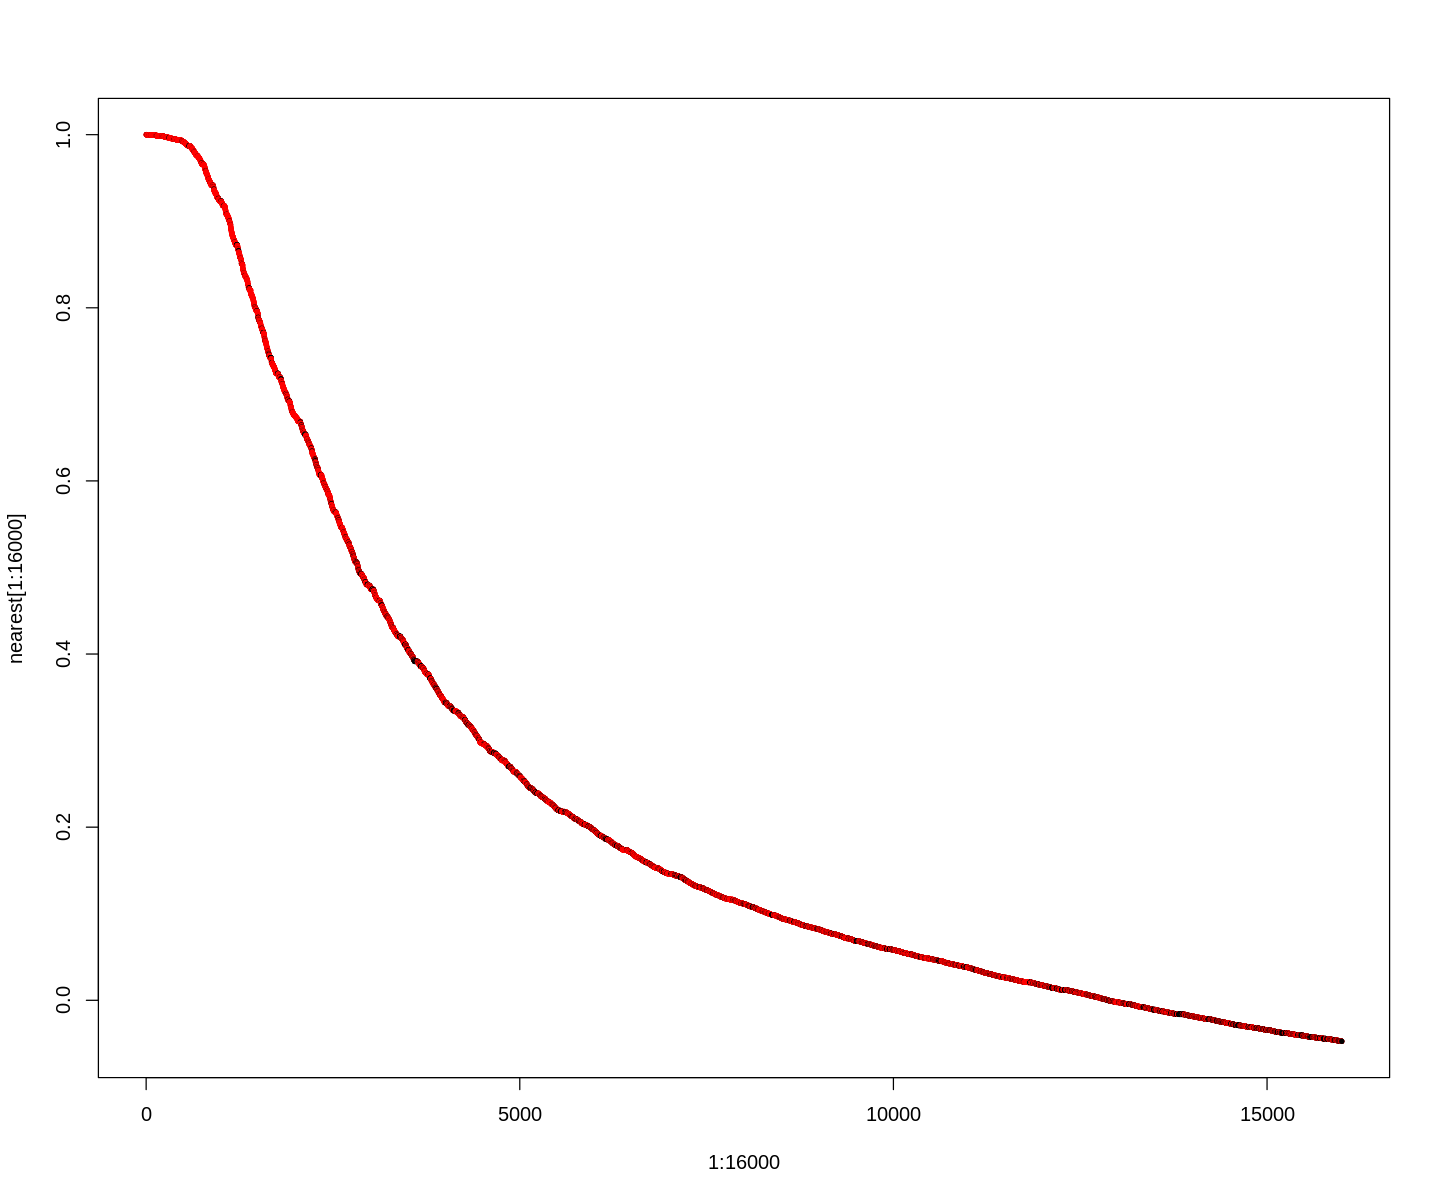

In [ ]:
nearest <- sort(cosines(dls[, analysis_dim], a1_w2$ls[analysis_dim]), decreasing=T)
clickcols2 <- rep("black", 32000)
clickcols2[clickbait == "1"] <- "red"
options(repr.plot.width=12, repr.plot.height=10)
plot(1:16000, nearest[1:16000], pch=20, cex=0.7, col=clickcols2[strtoi(names(nearest))])

In the first part of the result, which is the most relevant in terms of cosine similarity, there are much more red points than in the rest of the graph. This means that the quality of the query is high.

Let's continue on this path by iterating the method.

In [ ]:
corr_terms(a1_w2, T, 0.99, 20)

    based    zodiac character      sign  favorite     month     birth      know 
0.9997529 0.9946220 0.9946010 0.9942569 0.9911607 0.9904551 0.9879404 0.9525290 
     date      song    disney     guess celebrity  question questions    potter 
0.9114492 0.9074657 0.9021702 0.8947914 0.8853766 0.8850787 0.8475060 0.7815904 
     well     harry  identify      name 
0.7624368 0.7607601 0.7487986 0.7324274 

    based    zodiac      sign  favorite character     month 
 5.626504  3.760570  3.327793  2.434613  1.328918  0.520860 


In [ ]:
a1_w3 <- makequery("favorite based zodiac", tdm, lsar)
eval_query(a1_w3, a1_w2, 16000, 5)

[1] "Which Of Miley Cyrus' Iconic VMA Looks Matches Your Zodiac Sign"           
[2] "Which Character From \"Arrested Development\" Are You Based On Your Zodiac"
[3] "Which Disney Song Are You Based On Your Zodiac Sign"                       
[4] "Which \"Breaking Bad\" Character Is Your Soulmate Based On Your Zodiac"    
[5] "Which \"Suicide Squad\" Character Are You Based On Your Zodiac"            

    0     1 
 3832 12168 

Intersection with the previous query: 15178

In [ ]:
corr_terms(a1_w3, T, 0.99, 20)

   zodiac      sign     based character  favorite     month     birth      know 
0.9988280 0.9986899 0.9977846 0.9874851 0.9823964 0.9819117 0.9788933 0.9349490 
     date      song    disney     guess  question celebrity questions    potter 
0.8875836 0.8824934 0.8811012 0.8687123 0.8630452 0.8595713 0.8229941 0.7519996 
    harry      well  identify      name 
0.7290526 0.7251323 0.7113078 0.6935691 

   based   zodiac     sign 
5.626504 3.760570 3.327793 


In [ ]:
a1_w4 <- makequery("favorite based zodiac sign", tdm, lsar)
eval_query(a1_w4, a1_w3, 16000, 5)

[1] "What Karaoke Song Should You Sing Based On Your Zodiac Sign"
[2] "Which Lana Del Rey Song Are You Based On Your Zodiac Sign"  
[3] "Which Nirvana Song Are You Based On Your Zodiac Sign"       
[4] "Which \"ANTI\" Song Are You Based On Your Zodiac Sign"      
[5] "Which Ed Sheeran Song Are You Based On Your Zodiac Sign"    

    0     1 
 3781 12219 

Intersection with the previous query: 15808

Since the titles are short in length, it is reasonable to stop the analysis with a four words query and perform a Chi-squared test to check how much the query and the class clickbait are correlated.

In [ ]:
a1_final_q <- table(1:nrow(dls) %in% top(cosines(dls[, analysis_dim], a1_w4$ls[analysis_dim]), 16000), clickbait=="1" )
dimnames(a1_final_q) <- list(favorite_based_zodiac_sign = c("No", "Si"), clickbait = c("No", "Si"))

c1 = chisq.test(a1_final_q, correct=FALSE)
c1$expected
cat("\n")
c1$observed
cat("\np-value:", c1$p.value)

,No,Si
No,8000.75,8000.25
Si,8000.25,7999.75


                          clickbait
favorite_based_zodiac_sign    No    Si
                        No 12220  3781
                        Si  3781 12219


p-value: 0

With this query we are able to retreive 12219 over the 16000 clickbait titles (76% of them). This result and the p-value show that there is a very high correlation between the query and the class of clickbait titles.

By interpreting the terms found in the query `favorite based zodiac sign` we can assert that one of the causes of clickbait titles is that they promise to discover personality features, **favorite** things or other peculiarity **based** on the **zodiac sign**.

## Analysis on word `laugh`

We can repeat the same analysis, done for the prevoius term, with the term `laugh`

In [ ]:
a2_w1 <- makequery("laugh", tdm, lsar)

In [ ]:
corr_terms(a2_w1, T, 0.99, 20)

     laugh guaranteed     tweets       make     thatll       will       feel 
 0.9956761  0.9920967  0.9841797  0.9801807  0.9753852  0.9405450  0.9361787 
 determine      every       test      heart      posts  hilarious     photos 
 0.9220762  0.8997380  0.8795029  0.8686620  0.8584889  0.8304366  0.8166107 
    better     quotes       time   pictures       easy    moments 
 0.7919612  0.7878384  0.7787652  0.7636830  0.7547591  0.7424386 

     laugh guaranteed 
 1.9554349  0.5498155 


In [ ]:
a2_w2 <- makequery("laugh guaranteed", tdm, lsar)
eval_query(a2_w2, a2_w1, 16000, 5)

[1] "17 Desserts Guaranteed To Turn You Into A Chocoholic"         
[2] "15 Life-Changing Stuffings Guaranteed To Impress Your In-Laws"
[3] "23 Types Of Hummus Guaranteed To Blow Your Mind"              
[4] "33 Studio Ghibli Cakes That Are Guaranteed To Blow You Away"  
[5] "15 Creepy Eyeball Treats Guaranteed To Scare Your Guests"     

    0     1 
 3121 12879 

Intersection with the previous query: 15997

In [ ]:
corr_terms(a2_w2, T, 0.98, 20)

     laugh guaranteed     tweets       make     thatll       will       feel 
 0.9963431  0.9930165  0.9855089  0.9816322  0.9770224  0.9431081  0.9387504 
 determine      every       test      heart      posts  hilarious     photos 
 0.9248239  0.9029179  0.8829990  0.8724285  0.8622960  0.8346378  0.8209688 
    better     quotes       time   pictures       easy    moments 
 0.7965113  0.7920407  0.7834506  0.7686226  0.7596332  0.7474402 

      make      laugh     tweets guaranteed 
 4.7686277  1.9554349  1.7731147  0.5498155 


In [ ]:
a2_w3 <- makequery("laugh guaranteed make", tdm, lsar)
eval_query(a2_w3, a2_w2, 16000, 5)

[1] "17 QVC Fails Guaranteed To Make You Laugh"               
[2] "17 Jokes About Chelsea Guaranteed To Make You Laugh"     
[3] "16 Customer Complaints Guaranteed To Make You Laugh"     
[4] "17 Glitches So WTF They'll Make You Laugh Uncontrollably"
[5] "29 Tweets About Technology Guaranteed To Make You Laugh" 

    0     1 
 3116 12884 

Intersection with the previous query: 15919

In [ ]:
corr_terms(a2_w3, T, 0.99, 20)

     laugh guaranteed     tweets       make     thatll       will       feel 
 0.9994868  0.9979115  0.9931102  0.9904368  0.9870400  0.9595197  0.9558113 
 determine      every       test      heart      posts  hilarious     photos 
 0.9435800  0.9245400  0.9068158  0.8972082  0.8881786  0.8629351  0.8503584 
    better     quotes       time   pictures       easy    moments 
 0.8277593  0.8224424  0.8156254  0.8011930  0.7933673  0.7819617 

      make      laugh     tweets guaranteed 
 4.7686277  1.9554349  1.7731147  0.5498155 


In [ ]:
a2_w4 <- makequery("laugh guaranteed make tweets", tdm, lsar)
eval_query(a2_w4, a2_w3, 16000, 5)

[1] "29 Tweets About Technology Guaranteed To Make You Laugh"          
[2] "27 Tweets About Pregnancy That Are Guaranteed To Make You Laugh"  
[3] "24 Tweets About Sleep Guaranteed To Make You Laugh"               
[4] "23 Tweets About Mall Santas That Are Guaranteed To Make You Laugh"
[5] "17 Glitches So WTF They'll Make You Laugh Uncontrollably"         

    0     1 
 3122 12878 

Intersection with the previous query: 15974

In [ ]:
a2_final_q <- table(1:nrow(dls) %in% top(cosines(dls[, analysis_dim], a2_w4$ls[analysis_dim]), 16000), clickbait=="1" )
dimnames(a2_final_q) <- list(laugh_guaranteed_make_tweets = c("No", "Si"), clickbait = c("No", "Si"))

c2 = chisq.test(a2_final_q, correct=FALSE)
c2$expected
cat("\n")
c2$observed
cat("\np-value:", c1$p.value)

,No,Si
No,8000.75,8000.25
Si,8000.25,7999.75


                            clickbait
laugh_guaranteed_make_tweets    No    Si
                          No 12879  3122
                          Si  3122 12878


p-value: 0

With this query we are able to retreive 12878 over the 16000 clickbait titles (80% of them). This result and the p-value show that there is a very high correlation between the query and the class of clickbait titles.

By interpreting the terms found in the query `laugh guaranteed make tweets` we can assert that another cause of clickbait titles is that they contain **tweets** or other things which are **guranteed** to **make** you **laugh**.